In [1]:
!pip install kloppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 661.0 kB/s eta 0:00:00


In [2]:
from kloppy import datasets, wyscout
import json
import pandas as pd
import numpy as np
from matplotlib.patches import Arc
import matplotlib.pyplot as plt

In [3]:
def load_json(json_path):
    with open(json_path) as f:
        data = json.load(f)
        matches = pd.json_normalize(data, sep = "_")
    return matches

In [4]:
def drop0var(df):
    """
    param: df, a pandas dataframe
    """
    todrop = (df.var()[df.var() == 0]).index.values
    df = df.drop(todrop, axis=1)
    return df

In [5]:
def create_pitch(length, width, linecolor, bounds = 15):

    """
    mainly stolen from fc python
    param length: an int the length of the field
    param width: an int the height of the field
    param linecolor: the color of the lines
"""
    #Create figure
    fig=plt.figure()
    #fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,width], color=linecolor)
    plt.plot([0,length],[width,width], color=linecolor)
    plt.plot([length,length],[width,0], color=linecolor)
    plt.plot([length,0],[0,0], color=linecolor)
    plt.plot([length/2,length/2],[0,width], color=linecolor)
    plt.fill_between(x = [-bounds, length + bounds],
                     y1 = [width + bounds, width + bounds],
                     y2 = [-bounds, -bounds], color='green')

    #Left Penalty Area
    plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
    plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
    plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

    #Right Penalty Area
    plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
    plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
    plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

    #Left 5-meters Box
    plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
    plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
    plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)

    #Right 5-meters Box
    plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
    plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
    plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)

    #Prepare Circles
    centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
    rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
    rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    #Axis titles
    #Tidy Axes
    plt.axis('off')

    return fig,ax


In [6]:
def map_players(x):
    try:
        return player_map[x]
    except:
        return "None"

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
length = 105
width = 68

In [8]:
def map_length(x):
    return x*length

def map_width(x):
    return x*width

In [9]:
manu_westham = datasets.load('wyscout', match_id = 2499724)
matchdf = manu_westham.to_pandas()

In [10]:
matches_json = '../input/being-difficult/matches_England.json'
players_json = '../input/being-difficult/players.json'
matches = load_json(matches_json)
players = load_json(players_json)

In [11]:
player_map = {}
for index, player in players.iterrows():
    player_map[str(player.wyId)] = player.firstName + " " + player.lastName 

In [12]:
matchdf['x'] = matchdf['coordinates_x'].apply(map_length)
matchdf['y'] = matchdf['coordinates_y'].apply(map_width)
matchdf['end_x'] = matchdf['end_coordinates_x'].apply(map_length)
matchdf['end_y'] = matchdf['end_coordinates_y'].apply(map_width)

In [13]:
alldf = []
for match in matches.wyId.unique():
    try:
        df = datasets.load('wyscout', match_id = match).to_pandas()
        df = df[df.event_type =='PASS']
        alldf.append(df)
    except:
        continue

In [14]:
allpasses = pd.concat(alldf)

In [15]:
matches = drop0var(matches)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [16]:
matchdf

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,...,is_counter_attack,pass_type,set_piece_type,body_part_type,goalkeeper_action_type,card_type,x,y,end_x,end_y
0,178494347,PASS,COMPLETE,True,1,5.546151,None,None,None,1611,...,False,SIMPLE_PASS,NaN,NaN,NaN,NaN,52.50,35.36,42.00,29.92
1,178494348,PASS,COMPLETE,True,1,6.708916,None,None,None,1611,...,False,SIMPLE_PASS,NaN,NaN,NaN,NaN,42.00,29.92,34.65,51.00
2,178494349,PASS,COMPLETE,True,1,9.612072,None,None,None,1611,...,False,SIMPLE_PASS,NaN,NaN,NaN,NaN,34.65,51.00,44.10,51.68
3,178494350,PASS,COMPLETE,True,1,10.718877,None,None,None,1611,...,False,SIMPLE_PASS,NaN,NaN,NaN,NaN,44.10,51.68,29.40,24.48
4,178494351,PASS,COMPLETE,True,1,12.728071,None,None,None,1611,...,False,SIMPLE_PASS,NaN,NaN,NaN,NaN,29.40,24.48,35.70,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,178496018,RECOVERY,None,None,2,2862.313235,None,None,None,1633,...,False,NaN,NaN,NaN,NaN,NaN,5.25,23.80,NaN,NaN
1642,178496019,BALL_OUT,None,None,2,2866.414500,None,None,None,1633,...,False,NaN,NaN,NaN,NaN,NaN,6.30,0.00,NaN,NaN
1643,178495982,PASS,COMPLETE,True,2,2879.021252,None,None,None,1611,...,False,HAND_PASS,THROW_IN,NaN,NaN,NaN,93.45,68.00,97.65,61.88
1644,178496020,TAKE_ON,None,None,2,2883.667683,None,None,None,1633,...,False,NaN,NaN,NaN,NaN,NaN,7.35,6.12,NaN,NaN


In [17]:
matchdf = drop0var(matchdf)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [18]:
for col in matchdf.columns:
    print(col)

event_id
event_type
result
success
period_id
timestamp
end_timestamp
ball_state
ball_owning_team
team_id
player_id
coordinates_x
coordinates_y
end_coordinates_x
end_coordinates_y
receiver_player_id
is_counter_attack
pass_type
set_piece_type
body_part_type
goalkeeper_action_type
card_type
x
y
end_x
end_y


In [19]:
matchdf.event_type

0           PASS
1           PASS
2           PASS
3           PASS
4           PASS
          ...   
1641    RECOVERY
1642    BALL_OUT
1643        PASS
1644     TAKE_ON
1645     TAKE_ON
Name: event_type, Length: 1646, dtype: object

In [20]:
# passes = matchdf[matchdf.event_type == "PASS"]
passes = allpasses

In [21]:
passes['x'] = passes['coordinates_x'].apply(map_length)
passes['y'] = passes['coordinates_y'].apply(map_width)

In [22]:
passes.team_id.iloc[0]

'1659'

In [23]:
def plot_event(df):
    create_pitch(length, width, 'white')
    first_team = df.team_id.iloc[0]
    for index, p in df.iterrows():
        color = 'red' if p.team_id == first_team else 'blue'
        x = p.x
        y = p.y
        plt.scatter(x, y, color = color)

    plt.show()

In [24]:
# plot_event(passes)

In [25]:
players.columns

Index(['weight', 'firstName', 'middleName', 'lastName', 'currentTeamId',
       'birthDate', 'height', 'wyId', 'foot', 'shortName',
       'currentNationalTeamId', 'passportArea_name', 'passportArea_id',
       'passportArea_alpha3code', 'passportArea_alpha2code', 'role_code2',
       'role_code3', 'role_name', 'birthArea_name', 'birthArea_id',
       'birthArea_alpha3code', 'birthArea_alpha2code'],
      dtype='object')

In [26]:
players[players.wyId == 7906]

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,...,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,role_code2,role_code3,role_name,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code
2900,63,Juan Manuel,,Mata Garc\u00eda,1611,1988-04-28,170,7906,left,Juan Mata,...,724,ESP,ES,MD,MID,Midfielder,Spain,724,ESP,ES


In [27]:
matchdf.player_id

0         7906
1       105338
2        70122
3         7936
4         7918
         ...  
1641      8301
1642      None
1643      None
1644     14703
1645      None
Name: player_id, Length: 1646, dtype: object

In [28]:
matchdf['player_name'] = matchdf.player_id.apply(map_players)

In [29]:
matchdf[['event_type', 'player_id', 'player_name', 'timestamp']]

,event_type,player_id,player_name,timestamp
0,PASS,7906,Juan Manuel Mata Garc\u00eda,5.546151
1,PASS,105338,Henrikh Mkhitaryan,6.708916
2,PASS,70122,Nemanja Mati\u0107,9.612072
3,PASS,7936,Paul Pogba,10.718877
4,PASS,7918,Phil Jones,12.728071
...,...,...,...,...
1641,RECOVERY,8301,Joe Hart,2862.313235
1642,BALL_OUT,None,None,2866.414500
1643,PASS,None,None,2879.021252
1644,TAKE_ON,14703,Marko Arnautovi\u0107,2883.667683


In [30]:
passes[['coordinates_x', 'coordinates_y']].max()

coordinates_x    1.0
coordinates_y    1.0
dtype: float64

In [31]:
passes[['coordinates_x', 'coordinates_y']].min()

coordinates_x    0.0
coordinates_y    0.0
dtype: float64

In [32]:
shots = matchdf[matchdf.event_type == 'SHOT']

In [33]:
for i, s in shots.iterrows():
    print(s)
    break

event_id                           178494555
event_type                              SHOT
result                            OFF_TARGET
success                                False
period_id                                  1
timestamp                         665.816769
end_timestamp                           None
ball_state                              None
ball_owning_team                        None
team_id                                 1611
player_id                             105338
coordinates_x                           0.89
coordinates_y                            0.7
end_coordinates_x                        0.0
end_coordinates_y                        0.0
receiver_player_id                       NaN
is_counter_attack                      False
pass_type                                NaN
set_piece_type                           NaN
body_part_type                           NaN
goalkeeper_action_type                   NaN
card_type                                NaN
x         

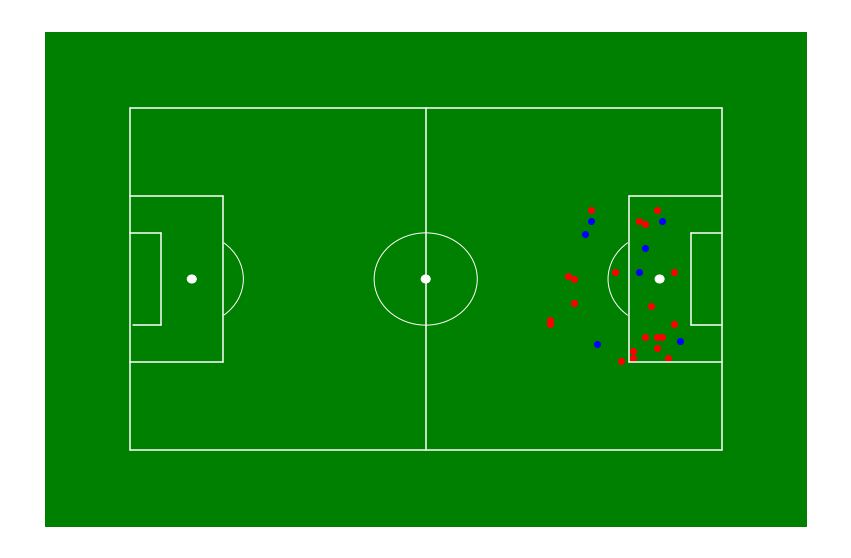

In [34]:
plot_event(shots)

In [35]:
passes.columns

Index(['event_id', 'event_type', 'result', 'success', 'period_id', 'timestamp',
       'end_timestamp', 'ball_state', 'ball_owning_team', 'team_id',
       'player_id', 'coordinates_x', 'coordinates_y', 'end_coordinates_x',
       'end_coordinates_y', 'receiver_player_id', 'is_counter_attack',
       'pass_type', 'body_part_type', 'set_piece_type',
       'goalkeeper_action_type', 'card_type', 'x', 'y'],
      dtype='object')

In [36]:
cluster_cols = ['coordinates_x', 'coordinates_y', 'end_coordinates_x', 'end_coordinates_y']

In [37]:
passes['end_x'] = passes['end_coordinates_x'].apply(map_length)
passes['end_y'] = passes['end_coordinates_y'].apply(map_width)

In [38]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=20,
                              random_state=42,
                              max_iter = 1,
                              init_params = 'kmeans').fit(passes[cluster_cols])

/opt/conda/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


In [39]:
passes['cluster'] = bgm.predict(passes[cluster_cols])
clusters_ = passes.groupby('cluster').mean()[['x', 'y', 'end_x', 'end_y']]

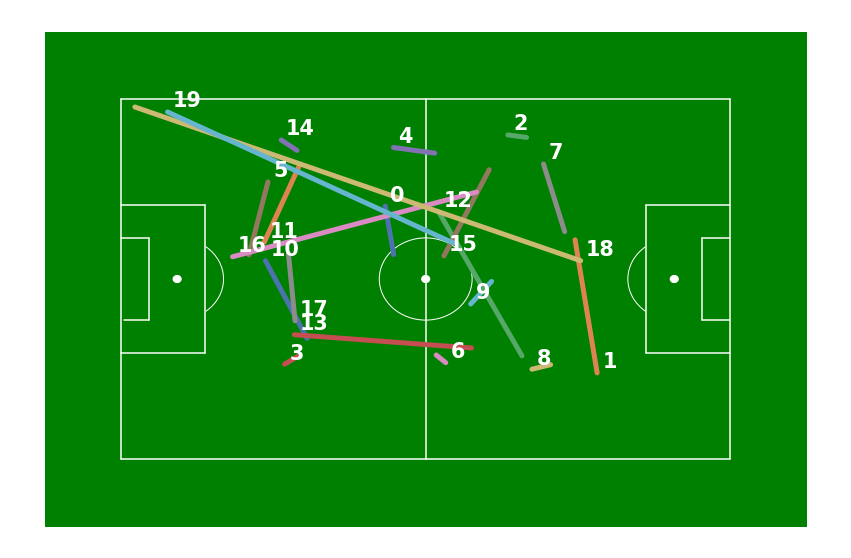

In [40]:
fig, ax = create_pitch(120, 80,'white')
for index, pass_ in clusters_.iterrows():
    if (index < 0):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 80 - y
    end_y = 80 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

In [41]:
clusters_.to_csv('pass_clusters.csv', index = False)

In [42]:
passes.columns

Index(['event_id', 'event_type', 'result', 'success', 'period_id', 'timestamp',
       'end_timestamp', 'ball_state', 'ball_owning_team', 'team_id',
       'player_id', 'coordinates_x', 'coordinates_y', 'end_coordinates_x',
       'end_coordinates_y', 'receiver_player_id', 'is_counter_attack',
       'pass_type', 'body_part_type', 'set_piece_type',
       'goalkeeper_action_type', 'card_type', 'x', 'y', 'end_x', 'end_y',
       'cluster'],
      dtype='object')

In [43]:
passes['ball_state']

0       None
1       None
2       None
3       None
4       None
        ... 
1738    None
1740    None
1741    None
1742    None
1745    None
Name: ball_state, Length: 358718, dtype: object

In [44]:
passes.to_csv('fullpasses.csv', index = False)

In [45]:
passes.columns

Index(['event_id', 'event_type', 'result', 'success', 'period_id', 'timestamp',
       'end_timestamp', 'ball_state', 'ball_owning_team', 'team_id',
       'player_id', 'coordinates_x', 'coordinates_y', 'end_coordinates_x',
       'end_coordinates_y', 'receiver_player_id', 'is_counter_attack',
       'pass_type', 'body_part_type', 'set_piece_type',
       'goalkeeper_action_type', 'card_type', 'x', 'y', 'end_x', 'end_y',
       'cluster'],
      dtype='object')

In [46]:
passes.groupby(['cluster', 'team_id']).size().reset_index()

,cluster,team_id,0
0,0,10531,691
1,0,1609,1453
2,0,1610,1229
3,0,1611,1130
4,0,1612,1442
...,...,...,...
395,19,1644,205
396,19,1646,272
397,19,1651,235
398,19,1659,205


In [47]:
passes.shape

(358718, 27)

In [48]:
with open('../input/football-event-data/teams.json') as f:
    teams_json = json.load(f)
    teams_df = pd.json_normalize(teams_json)

In [49]:
teams_df

,city,name,wyId,officialName,type,area.name,area.id,area.alpha3code,area.alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
...,...,...,...,...,...,...,...,...,...
137,Las Rozas,Spain,1598,Spain,national,Spain,724,ESP,ES
138,Beograd,Serbia,17322,Serbia,national,Serbia,688,SRB,RS
139,Bern,Switzerland,6697,Switzerland,national,Switzerland,756,CHE,CH
140,Warszawa,Poland,13869,Poland,national,Poland,616,POL,PL


In [50]:
teams_map = dict(zip(teams_df.wyId, teams_df.officialName))
passes['team'] = passes['team_id'].astype(int).map(teams_map)

In [51]:
teams_map[10531]

'Swansea City AFC'

In [52]:
passes['team']

0         AFC Bournemouth
1         AFC Bournemouth
2         AFC Bournemouth
3         AFC Bournemouth
4         AFC Bournemouth
              ...        
1738    Leicester City FC
1740    Leicester City FC
1741    Leicester City FC
1742           Arsenal FC
1745    Leicester City FC
Name: team, Length: 358718, dtype: object

In [53]:
passes[(passes.coordinates_x < 0.01) & (passes.coordinates_y < 0.01)][['end_coordinates_x', 'end_coordinates_y']].describe()

,end_coordinates_x,end_coordinates_y
count,2741.000000,2741.000000
mean,0.532039,0.476454
std,0.198678,0.289966
min,0.000000,0.000000
25%,0.430000,0.220000
50%,0.610000,0.450000
75%,0.670000,0.740000
max,1.000000,1.000000


In [54]:
team_clusters = passes.groupby(['cluster', 'team']).size().reset_index().sort_values(by=['cluster', 0], ascending=[True, False])
team_clusters.columns = ['cluster', 'team', 'passes']

In [55]:
team_clusters.head()

,cluster,team,passes
10,0,Manchester City FC,2010
1,0,Arsenal FC,1453
9,0,Liverpool FC,1442
16,0,Tottenham Hotspur FC,1417
4,0,Chelsea FC,1229


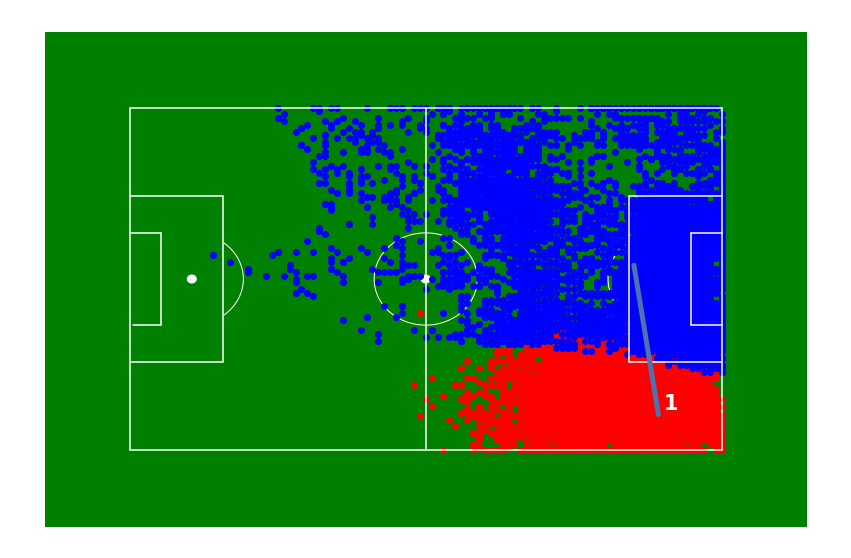

In [56]:
cluster = 1
fig, ax = create_pitch(105, 68,'white')
plt.scatter(passes[passes.cluster == cluster]['x'], (68 - passes[passes.cluster == cluster]['y']), c='red')
plt.scatter(passes[passes.cluster == cluster]['end_x'], (68 - passes[passes.cluster == cluster]['end_y']), c='blue')
for index, pass_ in clusters_.iterrows():
    if (index != cluster):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 68 - y
    end_y = 68 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.scatter(x, y, s=30, c='red')
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

In [57]:
passes[passes.cluster == cluster].shape

(10450, 28)

In [58]:
success_cluster = passes.groupby(['cluster', 'success']).size().reset_index()
success_cluster.columns = ['cluster', 'success', 'score']
success_cluster.head()

,cluster,success,score
0,0,False,1642
1,0,True,16575
2,1,False,4265
3,1,True,4436
4,2,False,3746


In [59]:
success_cluster.tail()

,cluster,success,score
35,17,True,20392
36,18,False,1983
37,18,True,165
38,19,False,890
39,19,True,745


In [60]:
success_cluster = success_cluster.pivot(index='cluster', columns='success', values = 'score')
success_cluster.columns = ['fail', 'success']
success_cluster['total'] = success_cluster['success'] + success_cluster['fail']  
success_cluster['ratio'] = success_cluster['success'] / success_cluster['total']  

In [61]:
success_cluster

,fail,success,total,ratio
cluster,,,,
0,1642,16575,18217,0.909864
1,4265,4436,8701,0.509826
2,3746,23620,27366,0.863115
3,3953,21956,25909,0.847428
4,4743,24796,29539,0.839433
5,845,14518,15363,0.944998
6,2587,22023,24610,0.894880
7,6043,11474,17517,0.655021
8,4079,17374,21453,0.809863


In [62]:
team_clusters.to_csv('team_clusters.csv', index = False)

In [63]:
success_cluster.to_csv('success_clusters.csv', index = False)

In [64]:
c18 = passes[passes.cluster == 18]

In [65]:
c18.success.value_counts()

False    1983
True      165
Name: success, dtype: int64

In [66]:
passes.groupby('cluster').size()

cluster
0     18217
1     10450
2     27366
3     25909
4     29539
5     15421
6     24914
7     17517
8     22339
9     22293
10    18484
11    19430
12    11006
13    15731
14    25866
15    17295
16     8574
17    22066
18     2336
19     3965
dtype: int64

In [67]:
passes[passes.cluster == 19]['result']

78            None
99            None
224       COMPLETE
345           None
353     INCOMPLETE
           ...    
701           None
1455    INCOMPLETE
1516          None
1714      COMPLETE
1732      COMPLETE
Name: result, Length: 3965, dtype: object

In [68]:
none_passes = passes[(passes.success != True) & (passes.success != False)]
none_passes

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,...,body_part_type,set_piece_type,goalkeeper_action_type,card_type,x,y,end_x,end_y,cluster,team
78,251700222,PASS,None,None,1,298.721998,None,None,None,1646,...,NaN,GOAL_KICK,NaN,NaN,0.0,0.0,71.40,8.84,19,Burnley FC
99,251700236,PASS,None,None,1,394.641716,None,None,None,1646,...,NaN,GOAL_KICK,NaN,NaN,0.0,0.0,67.20,25.84,19,Burnley FC
134,251700368,PASS,None,None,1,506.220518,None,None,None,1659,...,NaN,GOAL_KICK,NaN,NaN,105.0,68.0,64.05,33.32,1,AFC Bournemouth
345,251700418,PASS,None,None,1,1191.372555,None,None,None,1646,...,NaN,GOAL_KICK,NaN,NaN,0.0,0.0,70.35,21.76,19,Burnley FC
515,251700808,PASS,None,None,1,1746.363804,None,None,None,1659,...,NaN,GOAL_KICK,NaN,NaN,105.0,68.0,64.05,15.64,1,AFC Bournemouth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,177960755,PASS,None,None,2,1941.332376,None,None,None,1609,...,NaN,GOAL_KICK,NaN,NaN,0.0,0.0,18.90,8.16,14,Arsenal FC
1497,177960775,PASS,None,None,2,2026.279667,None,None,None,1631,...,NaN,GOAL_KICK,NaN,NaN,105.0,68.0,74.55,27.88,1,Leicester City FC
1516,177960810,PASS,None,None,2,2081.634766,None,None,None,1609,...,NaN,GOAL_KICK,NaN,NaN,0.0,0.0,38.85,22.44,19,Arsenal FC
1543,177960828,PASS,None,None,2,2195.371198,None,None,None,1631,...,NaN,GOAL_KICK,NaN,NaN,105.0,68.0,74.55,42.84,1,Leicester City FC


In [69]:
none_passes.cluster.unique()

array([19,  1, 14,  8,  5, 18,  6])

In [70]:
type(passes.result)

pandas.core.series.Series

In [71]:
passes.set_piece_type.unique()

array([nan, 'THROW_IN', 'FREE_KICK', 'GOAL_KICK', 'CORNER_KICK'],
      dtype=object)

In [72]:
passes.loc[:, 'set_piece_type'] = passes.set_piece_type.fillna('notsp')

In [73]:
free_passes = passes[passes.set_piece_type == 'notsp']

In [74]:
bgm = BayesianGaussianMixture(n_components=30,
                              random_state=42,
                              max_iter = 1000,
                              init_params = 'kmeans').fit(free_passes[cluster_cols])

/opt/conda/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


In [75]:
free_passes['clusterfp'] = bgm.predict(free_passes[cluster_cols])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


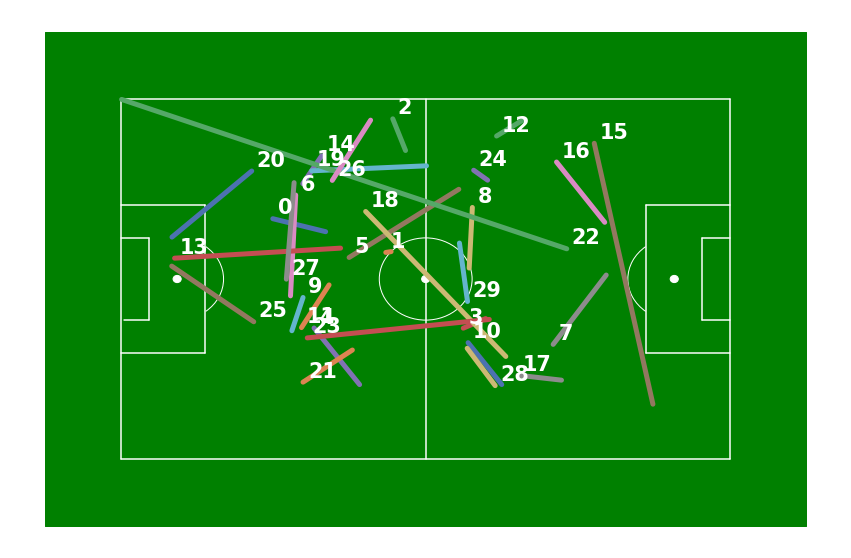

In [76]:
clusters_f = free_passes.groupby('clusterfp').mean()
fig, ax = create_pitch(120, 80,'white')
for index, pass_ in clusters_f.iterrows():
    if (index < 0):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 80 - y
    end_y = 80 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

In [77]:
print("it will be interesting to look at arsenal fr last season to this, arteta saying numbers, did they change or was it really just bad luck")

it will be interesting to look at arsenal fr last season to this, arteta saying numbers, did they change or was it really just bad luck


In [78]:
success_cluster = free_passes.groupby(['clusterfp', 'success']).size().reset_index()
success_cluster.columns = ['cluster', 'success', 'score']
success_cluster.head()

,cluster,success,score
0,0,False,1394
1,0,True,9931
2,1,False,757
3,1,True,8664
4,2,False,3362


In [79]:
success_cluster = success_cluster.pivot(index='cluster', columns='success', values = 'score')
success_cluster.columns = ['fail', 'success']
success_cluster['total'] = success_cluster['success'] + success_cluster['fail']  
success_cluster['ratio'] = success_cluster['success'] / success_cluster['total']  

In [80]:
success_cluster.sort_values(by='ratio')

,fail,success,total,ratio
cluster,,,,
22,1683,41,1724,0.023782
15,618,19,637,0.029827
7,4804,5177,9981,0.518686
16,4074,4998,9072,0.550926
23,2498,3474,5972,0.581715
18,1851,4132,5983,0.690623
5,3948,8960,12908,0.694143
19,2292,6110,8402,0.727208
17,1728,4729,6457,0.732383


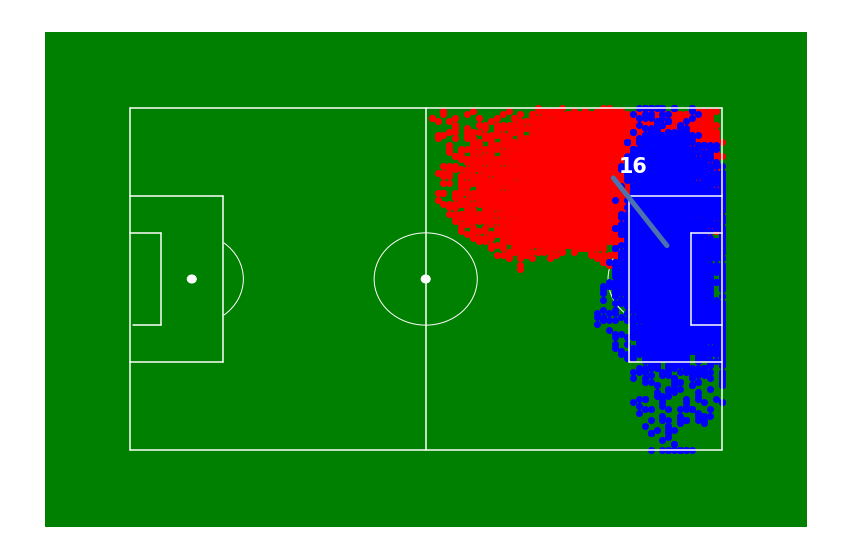

In [81]:
passes = free_passes
cluster = 16
fig, ax = create_pitch(105, 68,'white')
plt.scatter(passes[passes.clusterfp == cluster]['x'], (68 - passes[passes.clusterfp == cluster]['y']), c='red')
plt.scatter(passes[passes.clusterfp == cluster]['end_x'], (68 - passes[passes.clusterfp == cluster]['end_y']), c='blue')
for index, pass_ in clusters_f.iterrows():
    if (index != cluster):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 68 - y
    end_y = 68 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.scatter(x, y, s=30, c='red')
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

# 19 are passes that go back and to the corner? Crosses? Inverted?

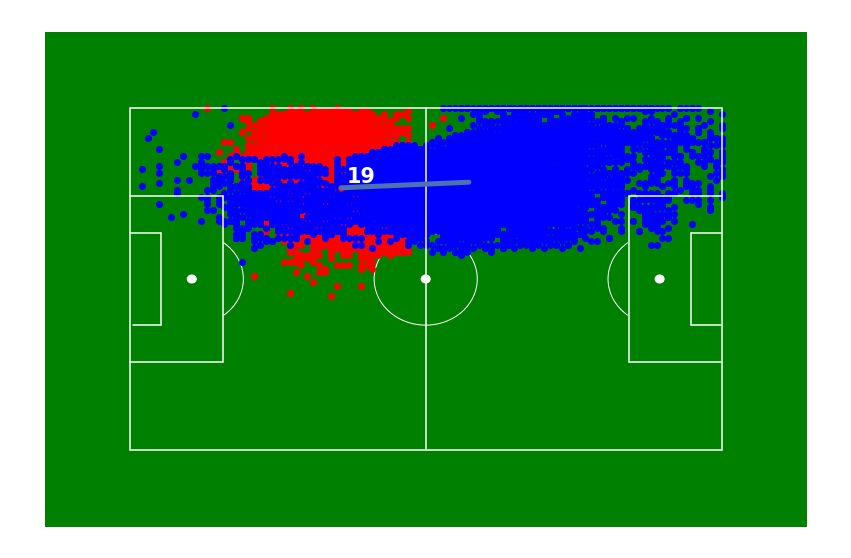

In [82]:
passes = free_passes
cluster = 19
fig, ax = create_pitch(105, 68,'white')
plt.scatter(passes[passes.clusterfp == cluster]['x'], (68 - passes[passes.clusterfp == cluster]['y']), c='red')
plt.scatter(passes[passes.clusterfp == cluster]['end_x'], (68 - passes[passes.clusterfp == cluster]['end_y']), c='blue')
for index, pass_ in clusters_f.iterrows():
    if (index != cluster):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 68 - y
    end_y = 68 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.scatter(x, y, s=30, c='red')
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

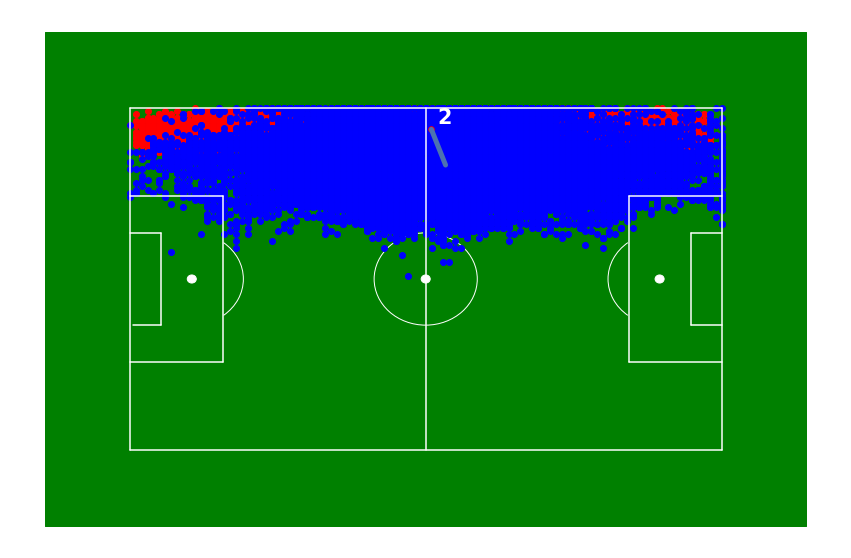

In [83]:
cluster = 2
fig, ax = create_pitch(105, 68,'white')
plt.scatter(passes[passes.clusterfp == cluster]['x'], (68 - passes[passes.clusterfp == cluster]['y']), c='red')
plt.scatter(passes[passes.clusterfp == cluster]['end_x'], (68 - passes[passes.clusterfp == cluster]['end_y']), c='blue')
for index, pass_ in clusters_f.iterrows():
    if (index != cluster):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 68 - y
    end_y = 68 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.scatter(x, y, s=30, c='red')
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

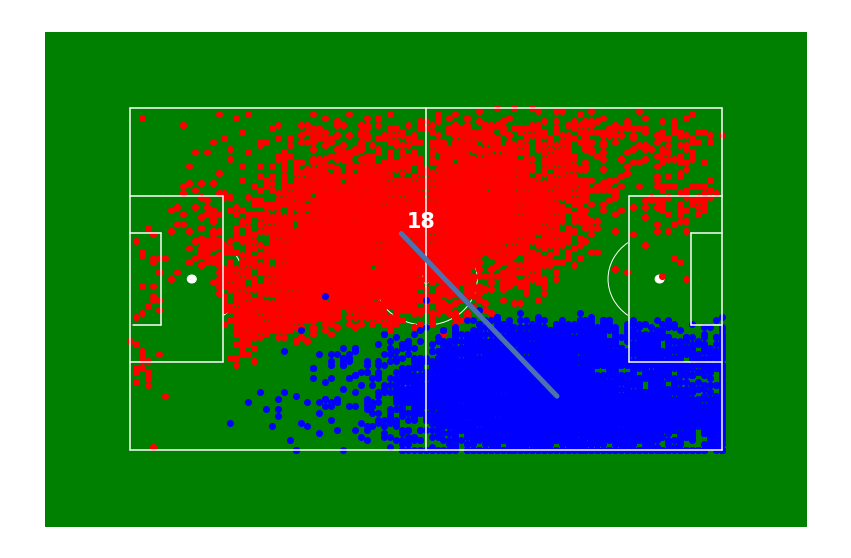

In [84]:
cluster = 18
fig, ax = create_pitch(105, 68,'white')
plt.scatter(passes[passes.clusterfp == cluster]['x'], (68 - passes[passes.clusterfp == cluster]['y']), c='red')
plt.scatter(passes[passes.clusterfp == cluster]['end_x'], (68 - passes[passes.clusterfp == cluster]['end_y']), c='blue')
for index, pass_ in clusters_f.iterrows():
    if (index != cluster):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 68 - y
    end_y = 68 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.scatter(x, y, s=30, c='red')
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

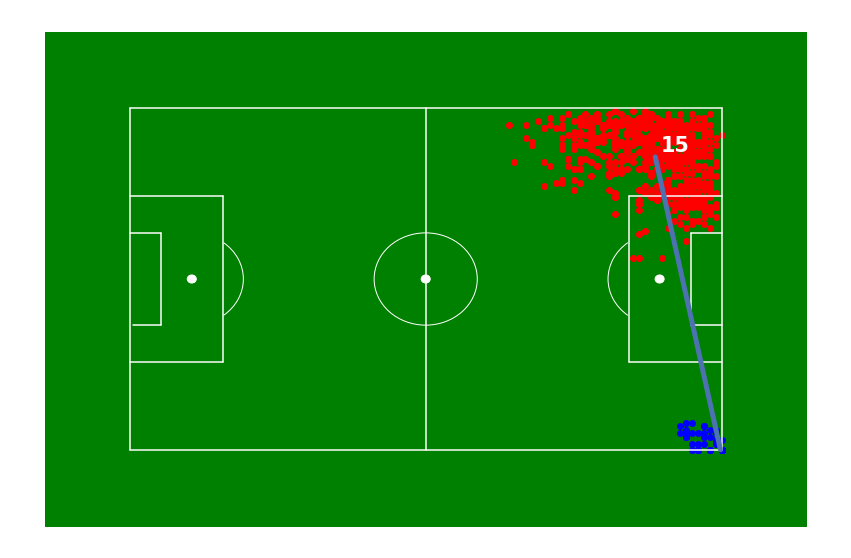

In [85]:
cluster = 15
fig, ax = create_pitch(105, 68,'white')
plt.scatter(passes[passes.clusterfp == cluster]['x'], (68 - passes[passes.clusterfp == cluster]['y']), c='red')
plt.scatter(passes[passes.clusterfp == cluster]['end_x'], (68 - passes[passes.clusterfp == cluster]['end_y']), c='blue')
for index, pass_ in clusters_f.iterrows():
    if (index != cluster):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 68 - y
    end_y = 68 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.scatter(x, y, s=30, c='red')
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

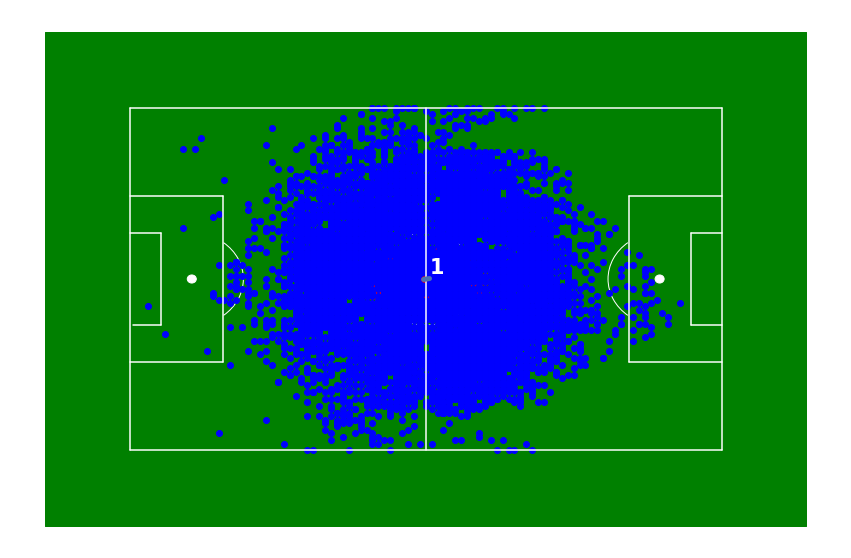

In [86]:
cluster = 1
fig, ax = create_pitch(105, 68,'white')
plt.scatter(passes[passes.clusterfp == cluster]['x'], (68 - passes[passes.clusterfp == cluster]['y']), c='red')
plt.scatter(passes[passes.clusterfp == cluster]['end_x'], (68 - passes[passes.clusterfp == cluster]['end_y']), c='blue')
for index, pass_ in clusters_f.iterrows():
    if (index != cluster):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 68 - y
    end_y = 68 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.scatter(x, y, s=30, c='red')
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

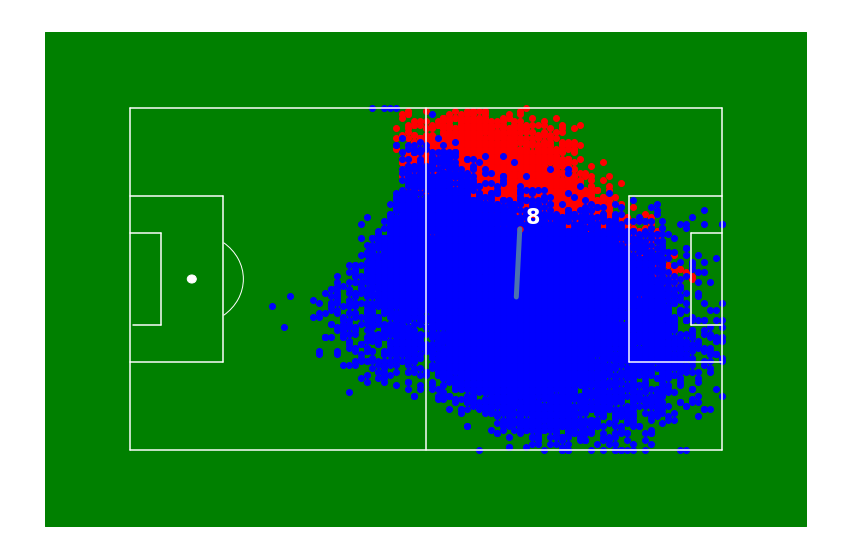

In [87]:
cluster = 8
fig, ax = create_pitch(105, 68,'white')
plt.scatter(passes[passes.clusterfp == cluster]['x'], (68 - passes[passes.clusterfp == cluster]['y']), c='red')
plt.scatter(passes[passes.clusterfp == cluster]['end_x'], (68 - passes[passes.clusterfp == cluster]['end_y']), c='blue')
for index, pass_ in clusters_f.iterrows():
    if (index != cluster):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 68 - y
    end_y = 68 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.scatter(x, y, s=30, c='red')
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

In [88]:
free_passes[free_passes['clusterfp']==19].columns

Index(['event_id', 'event_type', 'result', 'success', 'period_id', 'timestamp',
       'end_timestamp', 'ball_state', 'ball_owning_team', 'team_id',
       'player_id', 'coordinates_x', 'coordinates_y', 'end_coordinates_x',
       'end_coordinates_y', 'receiver_player_id', 'is_counter_attack',
       'pass_type', 'body_part_type', 'set_piece_type',
       'goalkeeper_action_type', 'card_type', 'x', 'y', 'end_x', 'end_y',
       'cluster', 'team', 'clusterfp'],
      dtype='object')

In [89]:
free_passes[free_passes['clusterfp']==19][['pass_type', 'ball_state']]

,pass_type,ball_state
3,HIGH_PASS,None
88,HIGH_PASS,None
224,SIMPLE_PASS,None
252,HIGH_PASS,None
265,HIGH_PASS,None
...,...,...
1364,HIGH_PASS,None
1473,SIMPLE_PASS,None
1509,SIMPLE_PASS,None
1558,SIMPLE_PASS,None


In [90]:
team_clusters = passes.groupby(['clusterfp', 'team', 'success']).size().reset_index()
team_clusters.columns = ['cluster', 'team', 'success', 'passes']

In [91]:
team_clusters.sort_values(by=['cluster', 'passes'], ascending=[True, False]).head(50)

,cluster,team,success,passes
21,0,Manchester City FC,True,944
19,0,Liverpool FC,True,759
3,0,Arsenal FC,True,732
23,0,Manchester United FC,True,664
33,0,Tottenham Hotspur FC,True,648
9,0,Chelsea FC,True,644
27,0,Southampton FC,True,482
31,0,Swansea City AFC,True,441
25,0,Newcastle United FC,True,431
1,0,AFC Bournemouth,True,421


In [92]:
c16 = team_clusters[team_clusters.cluster == 16].pivot(index='team', columns='success', values = 'passes')
c16.columns = ['fail', 'success']
c16['total'] = (c16.success + c16.fail)
c16['ratio'] = c16.success / c16.total
c16 = c16.sort_values(by='total', ascending = False).reset_index()
c16['total_rank'] = c16.index + 1
c16.sort_values(by = 'ratio')

,team,fail,success,total,ratio,total_rank
14,Huddersfield Town FC,191,160,351,0.455840,15
18,Swansea City AFC,171,158,329,0.480243,19
8,Leicester City FC,241,223,464,0.480603,9
12,West Ham United FC,187,181,368,0.491848,13
17,Stoke City FC,172,172,344,0.500000,18
7,Southampton FC,224,242,466,0.519313,8
15,West Bromwich Albion FC,165,183,348,0.525862,16
5,AFC Bournemouth,222,252,474,0.531646,6
13,Burnley FC,167,191,358,0.533520,14
4,Tottenham Hotspur FC,248,286,534,0.535581,5


In [93]:
c19 = team_clusters[team_clusters.cluster == 19].pivot(index='team', columns='success', values = 'passes')
c19.columns = ['fail', 'success']
c19['total'] = (c19.success + c19.fail)
c19['ratio'] = c19.success / c19.total
c19 = c19.sort_values(by='total', ascending = False).reset_index()
c19['total_rank'] = c19.index + 1 
c19.sort_values(by = 'ratio')

,team,fail,success,total,ratio,total_rank
17,Stoke City FC,126,230,356,0.646067,18
19,West Ham United FC,117,218,335,0.650746,20
9,Leicester City FC,142,269,411,0.654501,10
13,West Bromwich Albion FC,129,249,378,0.658730,14
12,Crystal Palace FC,125,267,392,0.681122,13
7,Burnley FC,142,304,446,0.681614,8
14,Newcastle United FC,118,253,371,0.681941,15
15,Swansea City AFC,117,251,368,0.682065,16
18,Huddersfield Town FC,111,239,350,0.682857,19
5,Brighton & Hove Albion FC,145,316,461,0.685466,6


In [94]:
team_clusters[(team_clusters.cluster == 19) & (team_clusters.success == True)]

,cluster,team,success,passes
752,19,AFC Bournemouth,True,302
754,19,Arsenal FC,True,375
756,19,Brighton & Hove Albion FC,True,316
758,19,Burnley FC,True,304
760,19,Chelsea FC,True,374
762,19,Crystal Palace FC,True,267
764,19,Everton FC,True,249
766,19,Huddersfield Town FC,True,239
768,19,Leicester City FC,True,269
770,19,Liverpool FC,True,398


In [95]:
team_clusters[(team_clusters.cluster == 19) & (team_clusters.success == False)]

,cluster,team,success,passes
751,19,AFC Bournemouth,False,108
753,19,Arsenal FC,False,92
755,19,Brighton & Hove Albion FC,False,145
757,19,Burnley FC,False,142
759,19,Chelsea FC,False,84
761,19,Crystal Palace FC,False,125
763,19,Everton FC,False,113
765,19,Huddersfield Town FC,False,111
767,19,Leicester City FC,False,142
769,19,Liverpool FC,False,111


In [96]:
c2 = team_clusters[team_clusters.cluster == 2].pivot(index='team', columns='success', values = 'passes')
c2.columns = ['fail', 'success']
c2['total'] = (c2.success + c2.fail)
c2['ratio'] = c2.success / c2.total
c2 = c2.sort_values(by='total', ascending = False).reset_index()
c2['total_rank'] = c2.index + 1
c2.sort_values(by = 'ratio')

,team,fail,success,total,ratio,total_rank
12,Burnley FC,208,698,906,0.770419,13
17,Everton FC,183,628,811,0.774353,18
18,West Bromwich Albion FC,175,626,801,0.781523,19
13,Watford FC,186,714,900,0.793333,14
16,Newcastle United FC,164,651,815,0.798773,17
8,Huddersfield Town FC,194,778,972,0.800412,9
10,Brighton & Hove Albion FC,186,748,934,0.800857,11
19,Stoke City FC,149,608,757,0.803170,20
7,Leicester City FC,202,832,1034,0.804642,8
14,Crystal Palace FC,157,673,830,0.810843,15
